In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit



In [116]:
usa = pd.read_csv("USA_temp.csv")


usa.head()
pst = ['California','Oregon','Washington','Nevada']
mt = ['Montana','Idaho','Wyoming','Utah','Colorado','Arizona','New Mexico']
ct = ['North Dakota','Alabama','Arkansas','Illinois','Iowa', 'Kansas',
      'Louisiana','Minnesota', 'Mississippi','Missouri','Nebraska','Oklahoma',
     'South Dakota','Tennessee','Texas',]
est = ['Connecticut', 'Delaware', 'District of Columbia',
       'Maryland', 'Florida', 'Georgia','Indiana','Kentucky','Maine',
       'Massachusetts', 'Michigan','New Hampshire','New Jersey',
      'New York', 'North Carolina','Ohio', 'Pennsylvania',
       'Rhode Island', 'South Carolina','Vermont', 'Virginia','West Virginia']

usa["State"].unique()



array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Maryland', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Additional Territories'],
      dtype=object)

2020


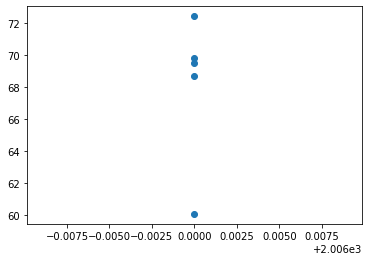

In [117]:
usa1995 = usa[usa["Year"] == 2006]
usa1995 = usa1995[usa1995["AvgTemperature"] > -50]
dt1995 = usa1995[usa1995["State"] == 'Michigan']
dt1995 = dt1995[dt1995["Day"] == 1]
dt1995jan = dt1995[dt1995["Month"] == 1]
dt1995jun = dt1995[dt1995["Month"] == 6]

print(usa["Year"].max())
#plt.plot(dt1995jan.index,dt1995jan["AvgTemperature"])
plt.scatter(dt1995jun["Year"],dt1995jun["AvgTemperature"])

In [118]:
mi1995 = usa1995[usa1995["State"] == 'Michigan']

mi1995["City"].unique()

array(['Detroit', 'Flint', 'Grand Rapids', 'Lansing', 'Sault Ste Marie'],
      dtype=object)

In [119]:
ca1995 = usa1995[usa1995["State"] == 'California']

ca1995["City"].unique()

array(['Fresno', 'Los Angeles', 'Sacramento', 'San Diego',
       'San Francisco'], dtype=object)

In [130]:
#usa = usa.drop(["X",'Unnamed: 0'],1)

pst_data = usa[usa["State"].isin(pst)]
pst_data["Region"] = "PST"

mt_data = usa[usa["State"].isin(mt)]
mt_data["Region"] = "MT"

ct_data = usa[usa["State"].isin(ct)]
ct_data["Region"] = "CT"

est_data = usa[usa["State"].isin(est)]
est_data["Region"] = "EST"


C:\Users\dylan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dylan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\dylan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [135]:
for month in pst_data["Month"].unique():
    print (month)

1
2
3
4
5
6
7
8
9
10
11
12


In [122]:
usa

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,North America,US,Alabama,Birmingham,1,1,1995,50.7
1,North America,US,Alabama,Birmingham,1,2,1995,37.2
2,North America,US,Alabama,Birmingham,1,3,1995,33.2
3,North America,US,Alabama,Birmingham,1,4,1995,33.3
4,North America,US,Alabama,Birmingham,1,5,1995,26.4
...,...,...,...,...,...,...,...,...
1455332,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
1455333,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
1455334,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
1455335,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [143]:

pst_test = pst_data[pst_data["Day"] == 1]
tmp_list = []
for year in pst_data["Year"].unique():
    temp = pst_test[pst_test["Year"]==year]
    for month in pst_data["Month"].unique():
        temp2 = temp[temp["Month"]== month]
        tmp_list.append(np.mean(temp2["AvgTemperature"]))
#print(tmp_list)
years = np.linspace(pst_data["Year"].min(),pst_data["Year"].max(),len(tmp_list))

tmp_arr = np.array(tmp_list)

fit_poly_1 = np.polyfit( years, tmp_arr, 2)
func = np.poly1d( fit_poly_1 )
y_exp = func(years)

plt.scatter(years,tmp_arr)
plt.plot(years,y_exp)

LinAlgError: SVD did not converge in Linear Least Squares